In [7]:
#plot: LR, comparison of div to rnd and sim over all three labels and #edge_servers = 30

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
noniidL10E2_path_file = "./../output/cifar10/acc/noniid/L10E2/"
noniidL20E5_path_file = "./../output/cifar10/acc/noniid/L20E5/"
fontsize = 20

In [8]:
#reading files

#div-all-labels-server30
noniidL10E2_metisp1_files = [
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_g_nw_d_minkowski_p1.0_CNN2_G10_partition_noniid90_nclient300.npy.part.30.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G3000_g_nw_d_minkowski_p1.0_CNN2_G100_partition_noniid90_label2_nclient300.npy.part.30.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G3000_g_nw_d_minkowski_p1.0_CNN2_G100_partition_noniid90_label3_nclient300.npy.part.30.weight.pth.acc.csv"
]

#sim-all-labels-server30
noniidL10E2_sim_files = [
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G3000_g_nw_sim_d_minkowski_p1.0_CNN2_G10_partition_noniid90_nclient300.npy.part.30.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G3000_g_nw_sim_d_minkowski_p1.0_CNN2_G100_partition_noniid90_label2_nclient300.npy.part.30.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G3000_g_nw_sim_d_minkowski_p1.0_CNN2_G100_partition_noniid90_label3_nclient300.npy.part.30.weight.pth.acc.csv"
]

#div-all-labels-server30
noniidL20E5_metisp1_files = [
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G5000_g_nw_d_minkowski_p1.0_CNN2_G10_partition_noniid90_nclient300.npy.part.30.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G3000_g_nw_d_minkowski_p1.0_CNN2_G100_partition_noniid90_label2_nclient300.npy.part.30.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G3000_g_nw_d_minkowski_p1.0_CNN2_G100_partition_noniid90_label3_nclient300.npy.part.30.weight.pth.acc.csv"
]
#sim-all-labels-server30
noniidL20E5_sim_files = [
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G3000_g_nw_sim_d_minkowski_p1.0_CNN2_G10_partition_noniid90_nclient300.npy.part.30.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G3000_g_nw_sim_d_minkowski_p1.0_CNN2_G100_partition_noniid90_label2_nclient300.npy.part.30.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G3000_g_nw_sim_d_minkowski_p1.0_CNN2_G100_partition_noniid90_label3_nclient300.npy.part.30.weight.pth.acc.csv"
]


#rnd-all-labels-server30
noniidL10E2_rnd_files = [
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_1z_rnd_num_client300.part30_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G3000_1z_rnd_num_client300.part30_partition_noniid90_label2_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G3000_1z_rnd_num_client300.part30_partition_noniid90_label3_nclient300.npy.weight.pth.acc.csv"

]
#rnd-all-labels-server30
noniidL20E5_rnd_files = [
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G5000_1z_rnd_num_client300.part30_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G3000_1z_rnd_num_client300.part30_partition_noniid90_label2_nclient300.npy.weight.pth.acc.csv",
    "eFL_CNN2_dr10lr0.15_dc0.99_B20_L20_E5_G3000_1z_rnd_num_client300.part30_partition_noniid90_label3_nclient300.npy.weight.pth.acc.csv"
]

noniidL10E2_dfs = []
noniidL10E2_n_files = len(noniidL10E2_metisp1_files)

for i in range(noniidL10E2_n_files):
    metisp1_df = pd.read_csv(noniidL10E2_path_file + noniidL10E2_metisp1_files[i])
    sim_df = pd.read_csv(noniidL10E2_path_file + noniidL10E2_sim_files[i])
    rnd_df = pd.read_csv(noniidL10E2_path_file + noniidL10E2_rnd_files[i])

    df = pd.DataFrame(metisp1_df.global_round)
    
    df['train_loss_sim_div'] = sim_df.train_loss / metisp1_df.train_loss
    df['train_acc_sim_div'] = sim_df.train_acc / metisp1_df.train_acc
    df['test_loss_sim_div'] = sim_df.test_loss / metisp1_df.test_loss
    df['test_acc_sim_div'] = sim_df.test_acc / metisp1_df.test_acc
    
    df['train_loss_rnd_div'] = rnd_df.train_loss / metisp1_df.train_loss
    df['train_acc_rnd_div'] = rnd_df.train_acc / metisp1_df.train_acc
    df['test_loss_rnd_div'] = rnd_df.test_loss / metisp1_df.test_loss
    df['test_acc_rnd_div'] = rnd_df.test_acc / metisp1_df.test_acc
    
    noniidL10E2_dfs.append(df)

noniidL20E5_dfs = []
noniidL20E5_n_files = len(noniidL20E5_metisp1_files)

for i in range(noniidL20E5_n_files):
    metisp1_df = pd.read_csv(noniidL20E5_path_file + noniidL20E5_metisp1_files[i])
    sim_df = pd.read_csv(noniidL20E5_path_file + noniidL20E5_sim_files[i])
    rnd_df = pd.read_csv(noniidL20E5_path_file + noniidL20E5_rnd_files[i])

    df = pd.DataFrame(metisp1_df.global_round)
    
    df['train_loss_sim_div'] = sim_df.train_loss / metisp1_df.train_loss
    df['train_acc_sim_div'] = sim_df.train_acc / metisp1_df.train_acc
    df['test_loss_sim_div'] = sim_df.test_loss / metisp1_df.test_loss
    df['test_acc_sim_div'] = sim_df.test_acc / metisp1_df.test_acc
    
    df['train_loss_rnd_div'] = rnd_df.train_loss / metisp1_df.train_loss
    df['train_acc_rnd_div'] = rnd_df.train_acc / metisp1_df.train_acc
    df['test_loss_rnd_div'] = rnd_df.test_loss / metisp1_df.test_loss
    df['test_acc_rnd_div'] = rnd_df.test_acc / metisp1_df.test_acc
    
    noniidL20E5_dfs.append(df)


In [9]:
#plot setting

line_color2 = [ 'mediumblue', 'orangered','purple']

lbl_metisp1_cluster = ["eFL_metis: #edge_servers = 10", "eFL_metis: #edge_servers = 20", "eFL_metis: #edge_servers = 30"]
lbl_rnd_cluster = ["eFL_rnd: #edge_servers = 10", "eFL_rnd: #edge_servers = 20", "eFL_rnd: #edge_servers = 30"]
lbl_cluster = ["#labels = 1", "#labels = 2", "#lables = 3"]


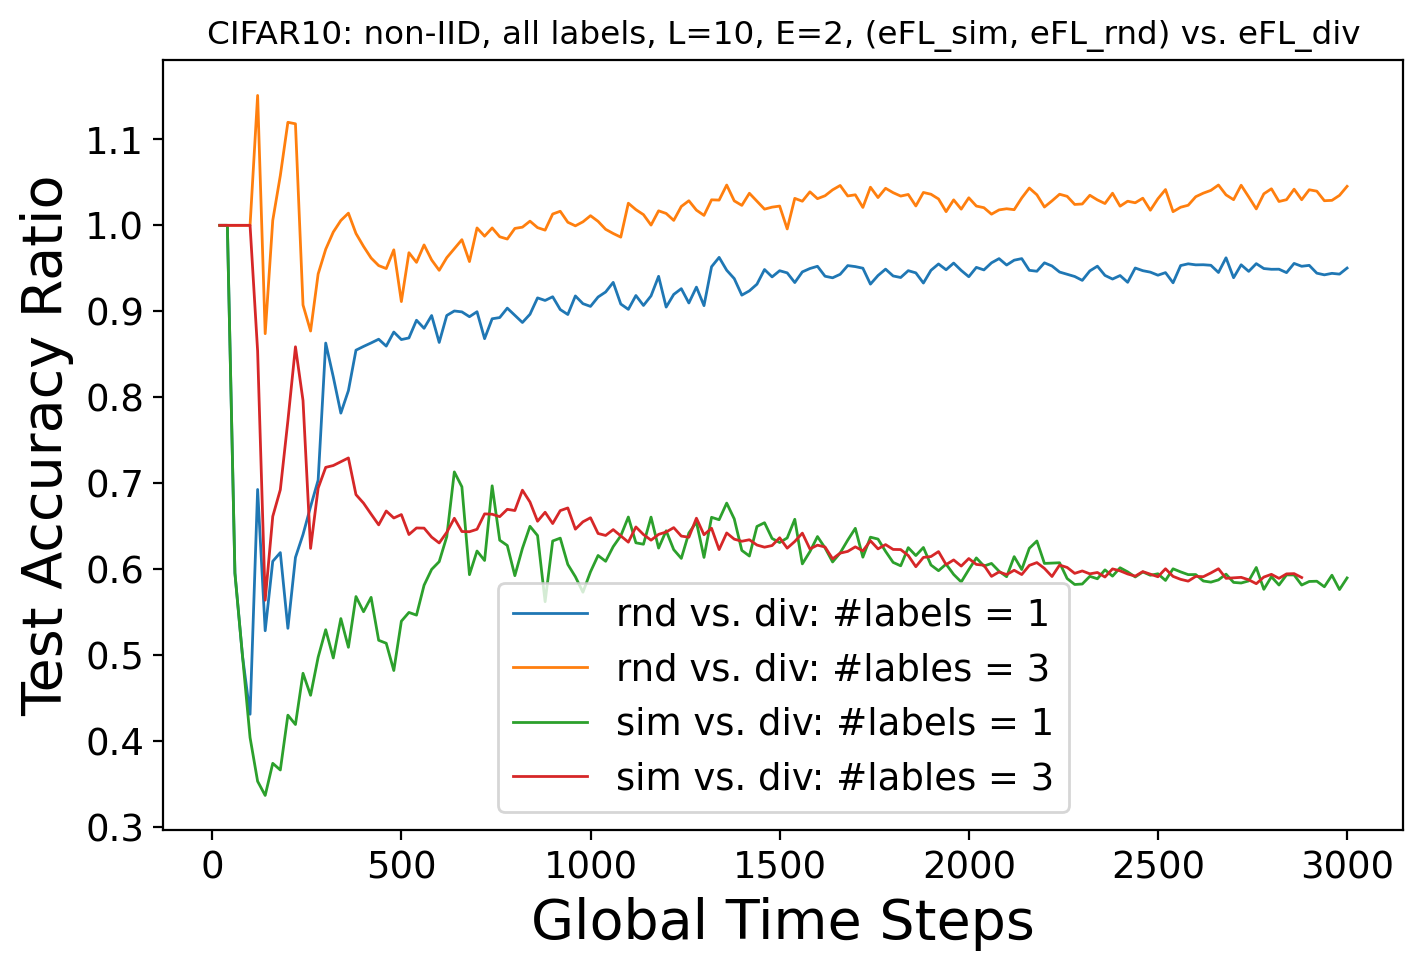

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(200)

for i in range(noniidL10E2_n_files):
    if i == 1:
        continue
    df = noniidL10E2_dfs[i][noniidL10E2_dfs[i].global_round <= 3000]
    ax.plot(df.global_round, df.test_acc_rnd_div, label = "rnd vs. div: " + lbl_cluster[i], linewidth = 1) #c = line_color2[1]

for i in range(noniidL10E2_n_files):
    if i == 1:
        continue
    df = noniidL10E2_dfs[i][noniidL10E2_dfs[i].global_round <= 3000]
    ax.plot(df.global_round, df.test_acc_sim_div, label = "sim vs. div: " + lbl_cluster[i], linewidth = 1) #c = line_color2[2]

ax.set_title("CIFAR10: non-IID, all labels, L=10, E=2, (eFL_sim, eFL_rnd) vs. eFL_div", size = fontsize/1.7)
ax.set_ylabel("Test Accuracy Ratio", size=fontsize)
ax.set_xlabel("Global Time Steps", size=fontsize)
ax.legend(loc='best', fontsize = fontsize/1.5)
plt.xticks(fontsize = fontsize/1.5)
plt.yticks(fontsize = fontsize/1.5)
plt.show()


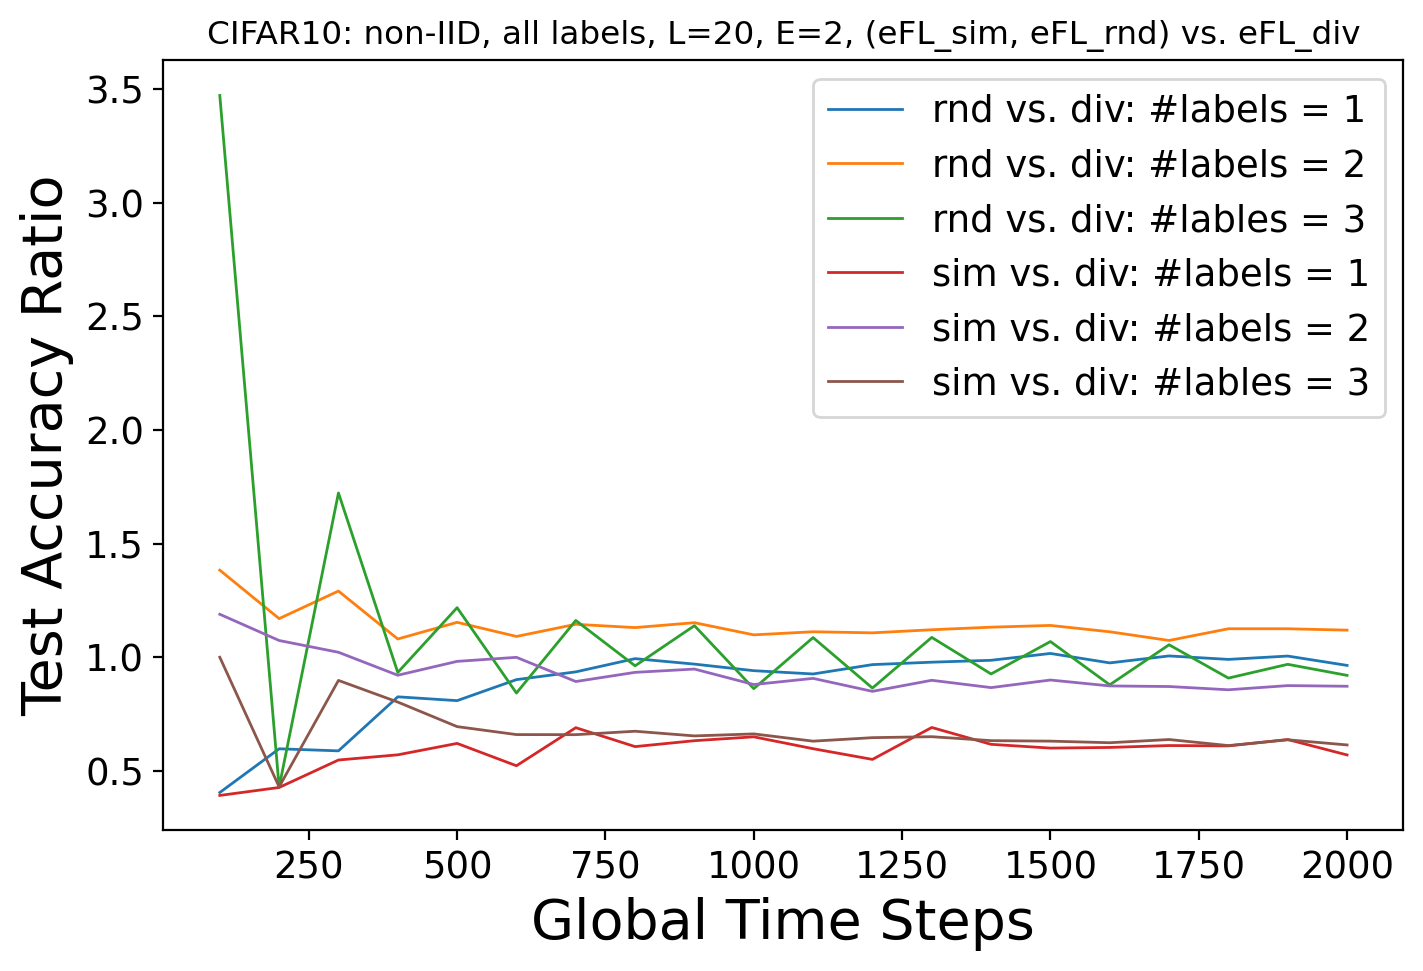

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(200)

for i in range(noniidL20E5_n_files):
    df = noniidL20E5_dfs[i][noniidL20E5_dfs[i].global_round <= 2000]
    ax.plot(df.global_round, df.test_acc_rnd_div, label = "rnd vs. div: " + lbl_cluster[i], linewidth = 1) #c = line_color2[1]

for i in range(noniidL20E5_n_files):
    df = noniidL20E5_dfs[i][noniidL20E5_dfs[i].global_round <= 2000]
    ax.plot(df.global_round, df.test_acc_sim_div, label = "sim vs. div: " + lbl_cluster[i], linewidth = 1) #c = line_color2[2]

ax.set_title("CIFAR10: non-IID, all labels, L=20, E=2, (eFL_sim, eFL_rnd) vs. eFL_div", size = fontsize/1.7)
ax.set_ylabel("Test Accuracy Ratio", size=fontsize)
ax.set_xlabel("Global Time Steps", size=fontsize)
ax.legend(loc='best', fontsize = fontsize/1.5)
plt.xticks(fontsize = fontsize/1.5)
plt.yticks(fontsize = fontsize/1.5)
plt.show()
